# Test

> Ce fichier permet de tester les différentes fonctions implémentées et vérifier qu'elles fonctionnent correctement

Charger les bibliothèques et les données

In [14]:
%autosave 0
%reload_ext autoreload
%autoreload 2

Autosave disabled


In [15]:

from data import *
import popularity
import knn
import svd
import knn_item_based
import als
from svd import *
from time import time
import pandas as pd

# load_data

In [16]:
from data import *

M = load_data(tiny=True)

assert M.shape == (50,40)
assert np.sum(~np.isnan(M)) == 389
print(movie_title(0))
print(movie_title(np.arange(4)))

Toy Story (1995)
['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', 'Get Shorty (1995)']


# popularity

In [17]:
from data import *
import popularity

M = load_data(tiny=True)

# note moyenne par film
print(np.nanmean(M, axis=1))

# utilisateur pris au hasard
rec = popularity.recommend(M, 3, new=True)
print(rec)
print(movie_title(rec))
assert np.isnan(M[3, rec])

# utilisateur ayant déjà vu le film le plus populaire
rec = popularity.recommend(M, 5, new=True)
print(rec)
print(movie_title(rec))
assert np.isnan(M[5, rec])

# complétion de toute la matrice
M_completed = popularity.complete(M)
assert np.all(~np.isnan(M_completed))
assert np.all(M_completed[~np.isnan(M)] == M[~np.isnan(M)])

[3.43589744 3.5        4.         3.57142857 3.42857143 4.25
 3.66666667 4.5        4.16666667 3.5        5.         3.08
 4.         2.44444444 4.57142857 3.5        4.125      4.5
 3.5        4.16666667 3.5        3.875      4.66666667 4.33333333
 3.25       4.         4.         5.         3.5        5.
 3.5        4.2        4.75       3.66666667 4.14285714 4.06666667
 3.63636364 3.85714286 4.         2.         2.5        3.
 5.         3.75       3.25       4.         4.         3.85714286
 4.1        4.23809524]
6
Twelve Monkeys (1995)
6
Twelve Monkeys (1995)


c:\Users\SobjioLagnol(Externa\OneDrive - Majorel\Bureau\SystRecomandation\popularity.py:9: RuntimeWarning: Mean of empty slice
  scores = np.nanmean(M_train, axis=0)  # Vecteur contenant la moyenne des notes par film
c:\Users\SobjioLagnol(Externa\OneDrive - Majorel\Bureau\SystRecomandation\popularity.py:9: RuntimeWarning: Mean of empty slice
  scores = np.nanmean(M_train, axis=0)  # Vecteur contenant la moyenne des notes par film
c:\Users\SobjioLagnol(Externa\OneDrive - Majorel\Bureau\SystRecomandation\popularity.py:43: RuntimeWarning: Mean of empty slice
  scores = np.nanmean(M_train, axis=0)  # Vecteur contenant la moyenne des notes de chaque film


# knn

In [18]:
from data import *
import knn

M = load_data(tiny=True)

# utilisateur pris au hasard
rec = knn.recommend(M, 3, new=True, k=10)
print(rec)
print(movie_title(rec))
assert np.isnan(M[3, rec])


# complétion de toute la matrice
M_completed = knn.complete(M, k=10)
assert np.all(~np.isnan(M_completed))

6
Twelve Monkeys (1995)


# svd

4
Copycat (1995)


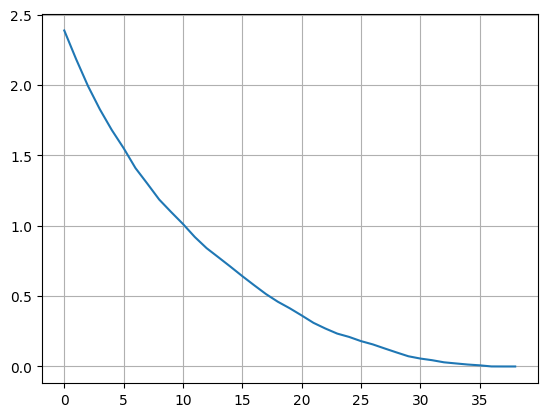

In [19]:
from data import *
import svd
from eval import *
import matplotlib.pyplot as plt

M = load_data(tiny=True)

# utilisateur pris au hasard
rec = svd.recommend(M, 3, new=True, k=10)
print(rec)
print(movie_title(rec))
assert np.isnan(M[3, rec])

# complétion de toute la matrice
M_completed = svd.complete(M, k=10)
assert np.all(~np.isnan(M_completed))

# erreur (d'entrainement) diminue quand k augmente
err = [RMSE(svd.complete(M, k), M) for k in range(1,40)]

plt.plot(err)
plt.grid()

# erreur (d'entrainement) nulle pour k=min(dim())
M_completed = svd.complete(M, k=min(M.shape[0], M.shape[1]))



assert RMSE(M_completed, M) < 10**-6

# Imputaion par la moyenne

c:\Users\SobjioLagnol(Externa\OneDrive - Majorel\Bureau\SystRecomandation\svd.py:21: RuntimeWarning: Mean of empty slice
  col_mean = np.nanmean(M_train, axis=0)


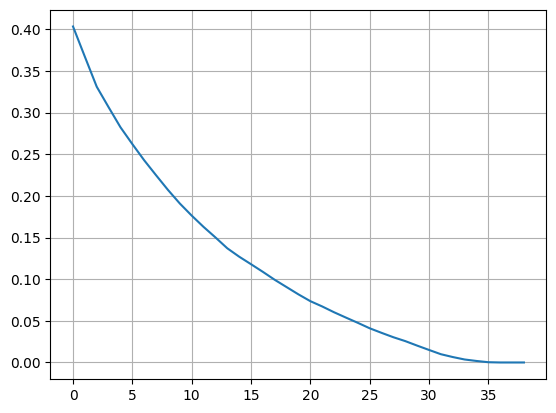

In [20]:
from svd import *
# complétion de toute la matrice
M_completed = svd.complete(M, k=10,replaceNA_fn=replaceNA_with_mean)
assert np.all(~np.isnan(M_completed))

# erreur (d'entrainement) diminue quand k augmente
err = [RMSE(svd.complete(M, k,replaceNA_fn=replaceNA_with_mean), M) for k in range(1,40)]

plt.plot(err)
plt.grid()

# erreur (d'entrainement) nulle pour k=min(dim())
M_completed = svd.complete(M, k=min(M.shape[0], M.shape[1]),replaceNA_fn=replaceNA_with_mean)



assert RMSE(M_completed, M) < 10**-6

# ALS

In [21]:
from data import *
import als
from eval import *
import matplotlib.pyplot as plt

M = load_data(tiny=True)

# utilisateur pris au hasard
rec = als.recommend(M, 3, new=True, k=10)
print(rec)
print(movie_title(rec))
assert np.isnan(M[3, rec])

# complétion de toute la matrice
M_completed = als.complete(M, k=10)
assert np.all(~np.isnan(M_completed))


32
Desperado (1995)


# erreur (d'entrainement) diminue quand k augmente

[3.94336512825079, 0.8171832594779117, 0.6492414047047315, 0.5784746175411927, 0.43266711164675414, 0.36356344841392957, 0.2426142013306938, 0.17554463846358406, 0.10342223918414573, 0.07805635355545798, 0.03632565065990828, 0.025488569232274192, 0.027374890321679463, 0.022441231759720057, 0.023545349610673026, 0.02261943093273693, 0.023305814646144084, 0.02268121774015757, 0.023285431567951237, 0.022971854055659293, 0.024249350277064947, 0.024449517971139482, 0.025299038825366396, 0.02672626326777879, 0.027420269606090487, 0.02687778164316728, 0.02903180640738947, 0.029529023354294876, 0.029132505023598095, 0.02961639112667174, 0.030100111650207644, 0.02966957390807061, 0.030437165261389197, 0.03306541622235287, 0.03257095873040203, 0.03374285532547397, 0.03314955354240692, 0.0327772244165198, 0.03477369706081679, 0.03580404850160647]


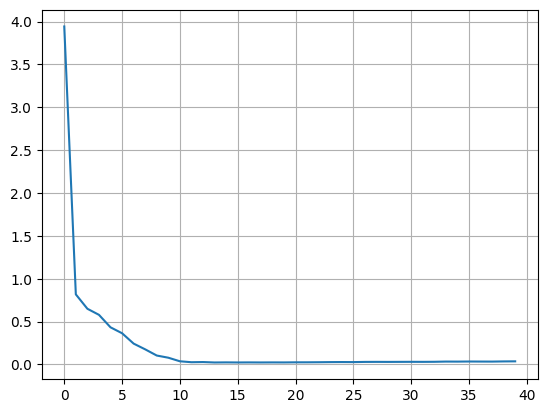

In [22]:
err = [RMSE(als.complete(M, k, n_iter=5), M) for k in range(40)]

print(err)
plt.plot(err)
plt.grid()

# erreur (d'entrainement) diminue quand nombre d'itérations augmente

[3.94336512825079, 0.8109661423690883, 0.6627094921265866, 0.49625060599022863, 0.3931800884002009, 0.24830468142179296, 0.16164527479246135, 0.09338110135994844, 0.05410624761346421, 0.04027624307045451, 0.025760085865039563, 0.02384224475671476, 0.02259360376302227, 0.02223730381518074, 0.022041924152257565, 0.021208300277561962, 0.022254642175157213, 0.022813176450002894, 0.0226961974783647, 0.022893551165062993, 0.022922706698237327, 0.023167447159645537, 0.02388949379578488, 0.023594797316178195, 0.023861539068768634, 0.024364085831845576, 0.023928503345953936, 0.02421281099961179, 0.025239977547125394, 0.02501899549426545, 0.025056939007215697, 0.02499057657231923, 0.026138681139748668, 0.026143366701712942, 0.025406526625488982, 0.025631763050135866, 0.026589399046509574, 0.02624090736012355, 0.027078927149005793, 0.027192073625967643]


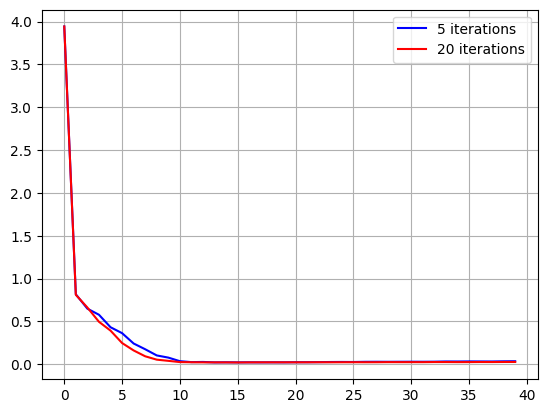

In [23]:
err20 = [RMSE(als.complete(M, k, n_iter=20), M) for k in range(40)]

print(err20)
plt.plot(err,  color='blue', label='5 iterations')
plt.plot(err20,  color='red', label='20 iterations')
plt.legend()
plt.grid()

# erreur (d'entrainement) nulle pour k=min(dim()) et lambda très petit

In [24]:
M_completed = als.complete(M, k=min(M.shape[0], M.shape[1]), n_iter=1, lambd=10**-8)
RMSE(M_completed, M)
M_completed = als.complete(M, k=min(M.shape[0], M.shape[1]), n_iter=3, lambd=10**-8)
RMSE(M_completed, M)
M_completed = als.complete(M, k=min(M.shape[0], M.shape[1]), n_iter=10, lambd=10**-8)
RMSE(M_completed, M)
assert RMSE(M_completed, M) <10**-6







# eval

In [25]:
from data import *
from eval import *
import popularity
import knn
import svd

M = load_data(tiny=True)

# get_train

In [26]:
M_train, M_validation = get_train_val(M, 0.9)
assert np.all(np.sum(np.isnan(M_train), axis=0))

# RMSE

In [27]:
print(M[0, :4])
assert np.sum(~np.isnan(M)) == 389
M_comp = M.copy()
M_comp[0, :4] = 0
assert RMSE(M_comp, M) == np.sqrt((5**2 + 3**2 + 4**2)/389)

[nan  5.  3.  4.]


# quantitative_comparison

In [34]:
recommenders = [
    {"fn": popularity.complete, "label": "popularity"},
    {"fn": lambda M_train: knn.complete(M, k=10), "label": "knn10"},
    {"fn": lambda M_train: svd.complete(M, 2), "label": "svd2"},
    {"fn": lambda M_train: svd.complete(M_train, k=2,replaceNA_fn=replaceNA_with_mean), "label": "svd_mean2"},
    {"fn": lambda M_train: als.complete(M, 21), "label": "als21"},
    {"fn": lambda M_train: knn_item_based.complete_item_based(M, 29), "label": "knn_item_based29"}
    ]


quantitative_comparison(RMSE, M, recommenders, prop=0.8, nrep=10)




c:\Users\SobjioLagnol(Externa\OneDrive - Majorel\Bureau\SystRecomandation\popularity.py:43: RuntimeWarning: Mean of empty slice
  scores = np.nanmean(M_train, axis=0)  # Vecteur contenant la moyenne des notes de chaque film
c:\Users\SobjioLagnol(Externa\OneDrive - Majorel\Bureau\SystRecomandation\svd.py:21: RuntimeWarning: Mean of empty slice
  col_mean = np.nanmean(M_train, axis=0)


,recommender,validation score,training score,computation time
0,popularity,1.078573,0.000000,0.000267
1,knn10,0.000000,0.000000,1.016566
2,svd2,2.239847,2.165071,0.000951
3,svd_mean2,1.076287,0.313367,0.002371
4,als21,0.024353,1.468295,0.108861
5,knn_item_based29,0.000000,1.309946,0.707434
